<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание данных

Набор данных находится в файле `/datasets/insurance.csv`.


- **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

In [1]:
# Широкоформатный Jupyter
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Импортируем базы данных, которые пригодятся в нашем исследование
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

# игнорируем ошибки matplotlib
import warnings
warnings.filterwarnings("ignore")

## Загрузка данных

***Загрузим и изучим данные.***

In [3]:
# Прочитаем файл и сохраним в датафрейм
data = pd.read_csv('/datasets/insurance.csv')

In [4]:
# посмотрим размер файла
data.shape

(5000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.50,0.50,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.95,8.44,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.36,9900.08,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.19,1.09,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.15,0.46,0.0,0.0,0.0,0.0,5.0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Кол-во дубликатов 153 

Кол-во пропусков в столбцах 
 Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64 



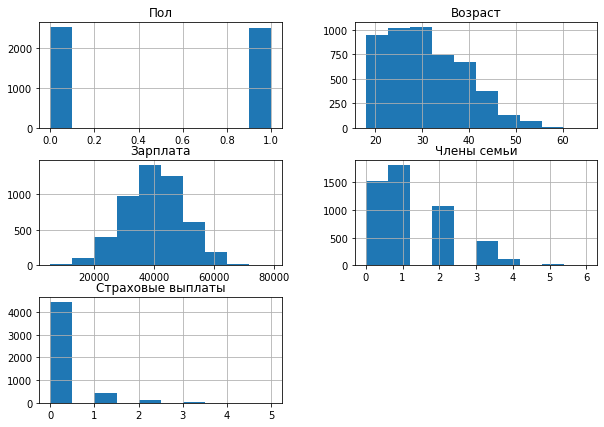

In [5]:
# Посмотрим основную информацию датафрейма
display(data.info(), data.describe(include='all').T.round(2), data.head())

# Посмотрим кол-во дубликатов
print('Кол-во дубликатов', data.duplicated().sum(), '\n')

# Проверим кол-во пропусков в столбцах датафрейма
print('Кол-во пропусков в столбцах', '\n', data.isna().sum(), '\n')
    
# Построим общую гистограмму для всех столбцов таблицы
data.hist(figsize=(10, 7))
plt.show()    

В нашем датафрейме 5 тысяч записей и 5 колонок. Наименования столбцов не соблюдены по правилам написания кода PEP8. Видим 153 явных дубликата. А вот пропущенные значения отсутсвуют. Формат столбцов - десятичный (числа с плавающей точкой) и целочисленный.

- Равномерное распределение по гендерной принадлежности - 50% на 50%
- Возраст клиентов распределени в среднем от 18 до 45 лет. Преобладающему кол-ву клиентов от 18 до 32. Людей старше 60 лет (максимальный возраст 65) в нашей выборке слишком мало;
- Зарплата - нормальное распределение с пиком со значением ~ 36000 - 41000. При этом высокое стандартное отклонение, а минмальная зарплата в 5300 выглядит как выбивающиеся значение;
- Количество членов семьи, кроме самого застраховано, распределенно от 1 до 6 человек. Больше всего семей, где только один застрахованный или еще 1-2 человека;
- Целевой признак: количество страховых выплат клиенту за последние 5 лет - в большинстве случаев страховые выплаты отсутствовали. Выборка неравномерна.

In [6]:
# Заменим тип данных в столбцах "Возраст" и "Зарплата" на целочисленный.

data['Возраст'] = data['Возраст'].astype('int64')
data['Зарплата'] = data['Зарплата'].astype('int64')

# Посмотрим
data.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

Для понимания дальнейшей обработки посмотрим детальнее на распределения

0    2505
1    2495
Name: Пол, dtype: int64


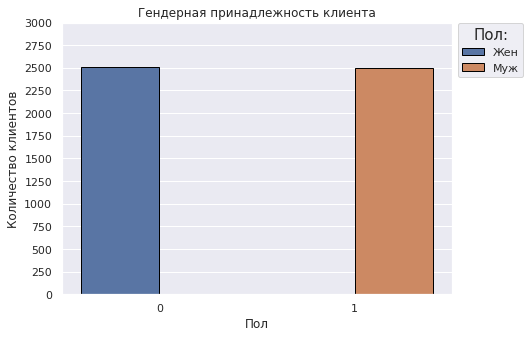

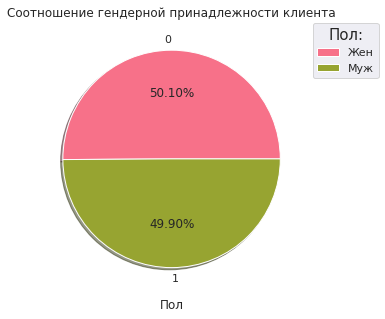

In [7]:
# Пол
# Чаще всего пол кодируется как 0 для женщин и 1 для мужчин, будем придерживаться такого распределения

# Посмотрим на кол-во мужчин и женщин
print(data['Пол'].value_counts())

# Посмотрим на столбчатый график 
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=data, x='Пол', ec='black', hue='Пол')
plt.title('Гендерная принадлежность клиента')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.yticks(ticks=np.arange(0,3001,250))
legend = plt.legend(['Жен', 'Муж'], title = "Пол:",
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# Посмотрим на круговую диаграмму
colors = sns.color_palette("husl", 4)
data.groupby(['Пол']).count().plot(kind='pie', y='Возраст',
  autopct='%.2f%%', colors=colors, shadow=True)
plt.title('Соотношение гендерной принадлежности клиента')
plt.xlabel('Пол')
plt.ylabel('')
legend = plt.legend(['Жен', 'Муж'], title = "Пол:",
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Распределение по гендеру равномерное, почти 50 на 50

count    5000.000000
mean       30.952800
std         8.440807
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: Возраст, dtype: float64


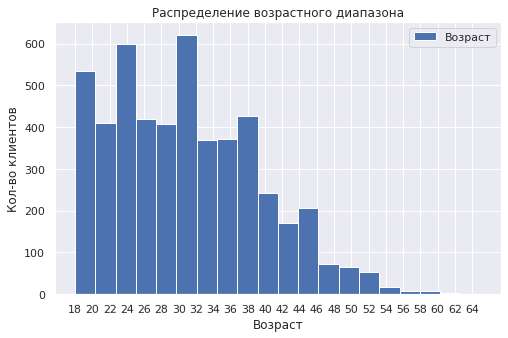

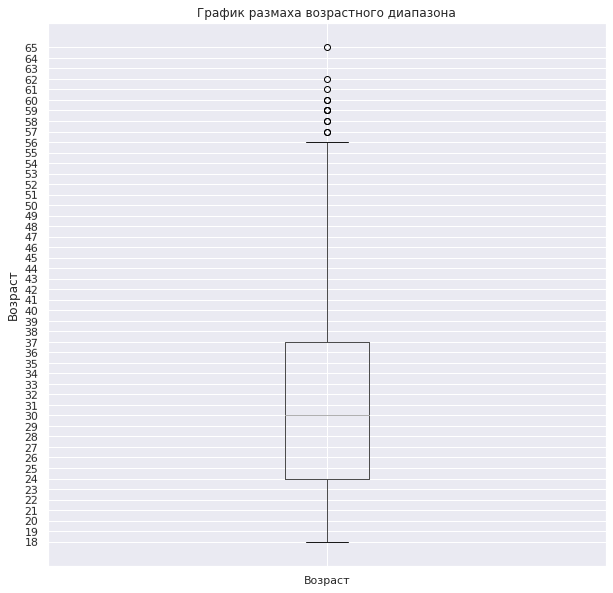

In [8]:
# Посмотрим на распределение возраста

#  Посмотрим на статистические данные столбца, которые дают представление о распределение значений
print(data['Возраст'].describe())

# гистограмма
data.plot(kind='hist', y='Возраст', bins=20, grid=True, figsize=(8, 5))
plt.title('Распределение возрастного диапазона')
plt.xlabel('Возраст')
plt.xticks(ticks=np.arange(18,66,2), rotation=1)
plt.ylabel('Кол-во клиентов')
plt.show()

# график размаха
data.boxplot(column = 'Возраст', figsize=(10,10))
plt.title('График размаха возрастного диапазона')
plt.yticks(ticks=np.arange(18,66,1), rotation=1)
plt.ylabel('Возраст')
plt.show()

Мы видим преобладание возратсных диапозонов от 18 до 20, от 22 до 26, и от 30 до 32. Клиентов старше 56 лет слишком мало.

count     5000.000000
mean     39916.359400
std       9900.082063
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64


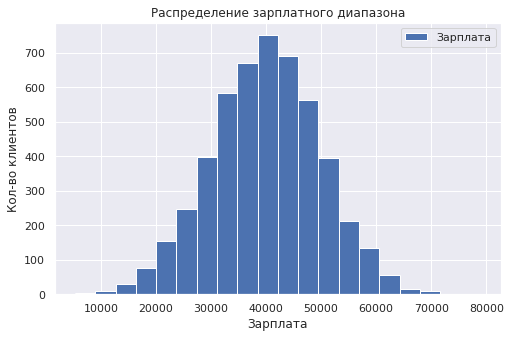

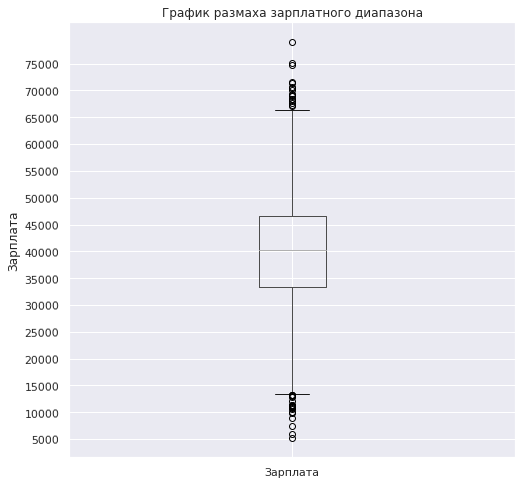

In [9]:
# Посмотрим на распределение зарплат

#  Посмотрим на статистические данные столбца, которые дают представление о распределение значений
print(data['Зарплата'].describe())

# гистограмма
data.plot(kind='hist', y='Зарплата', bins=20, grid=True, figsize=(8, 5))
plt.title('Распределение зарплатного диапазона')
plt.xlabel('Зарплата')
plt.ylabel('Кол-во клиентов')
plt.show()

# график размаха
data.boxplot(column = 'Зарплата', figsize=(8,8))
plt.title('График размаха зарплатного диапазона')
plt.yticks(ticks=np.arange(5000,80000,5000), rotation=1)
plt.ylabel('Зарплата')
plt.show()

Распределение зарплат нормальное. Среднее значение "ушло" недалеко от медианны и примерно равно 40000. Зарплаты ниже 14000 и выше 66000 выбивающиеся из общего диапазона.

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64


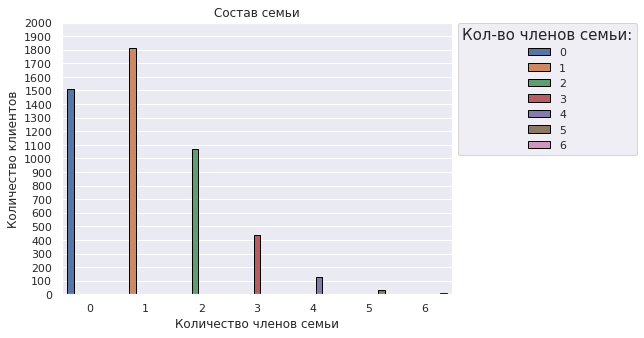

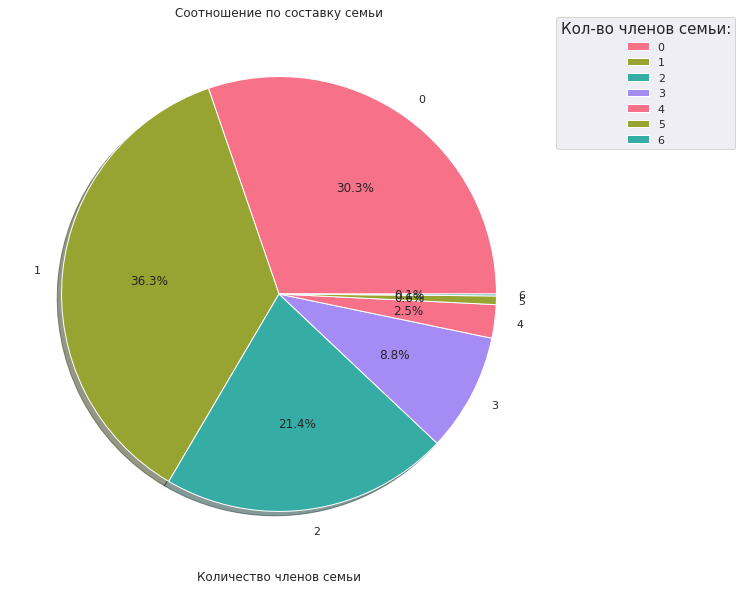

In [10]:
# Члены семьи


# Посмотрим на кол-во 
print(data['Члены семьи'].value_counts())

# Посмотрим на столбчатый график 
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=data, x='Члены семьи', ec='black', hue='Члены семьи')
plt.title('Состав семьи')
plt.xlabel('Количество членов семьи')
plt.ylabel('Количество клиентов')
plt.yticks(ticks=np.arange(0,2001,100))
legend = plt.legend(title = "Кол-во членов семьи:",
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# Посмотрим на круговую диаграмму
colors = sns.color_palette("husl", 4)
data.groupby(['Члены семьи']).count() .plot(kind='pie', y='Пол', figsize=(10, 10),
  autopct='%0.01f%%', colors=colors, shadow=True)
plt.title('Соотношение по составку семьи')
plt.xlabel('Количество членов семьи')
plt.ylabel('')
legend = plt.legend(title = "Кол-во членов семьи:",
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

30% от выборки приходится на семьи состоящие только из самого застрахованого. 36% - где еще 1 человек в семье. 21% - 2 человека. И 9% - это семья из 4 человек (включая клиента страховой компании).

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64


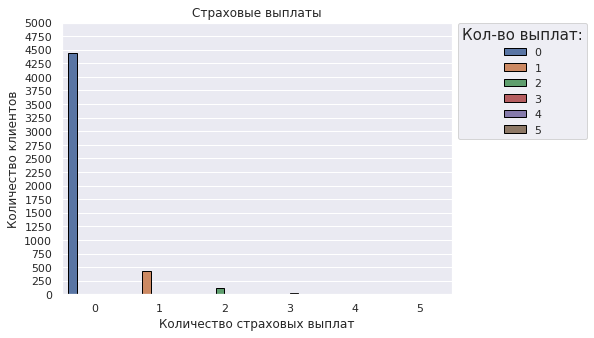

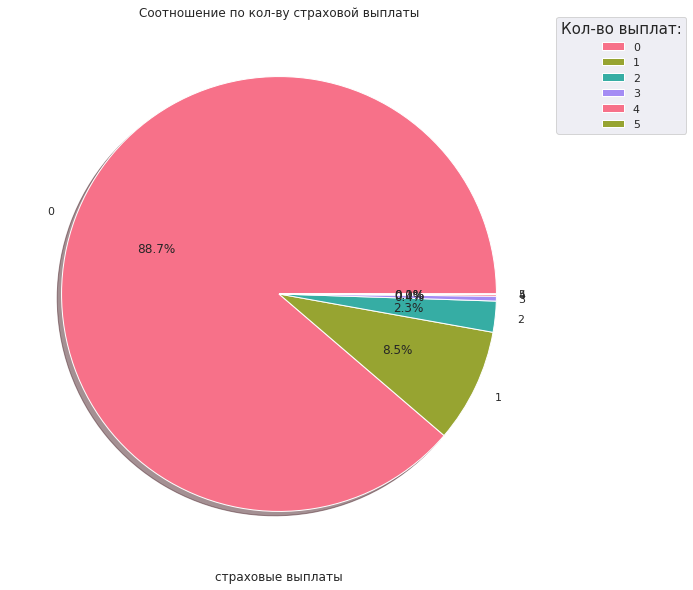

In [11]:
# Целевой признак: количество страховых выплат клиенту за последние 5 лет.


# Посмотрим на кол-во страховых выплат
print(data['Страховые выплаты'].value_counts())

# Посмотрим на столбчатый график 
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=data, x='Страховые выплаты', ec='black', hue='Страховые выплаты')
plt.title('Страховые выплаты')
plt.xlabel('Количество страховых выплат')
plt.ylabel('Количество клиентов')
plt.yticks(ticks=np.arange(0,5001,250))
legend = plt.legend(title = "Кол-во выплат:",
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# Посмотрим на круговую диаграмму
colors = sns.color_palette("husl", 4)
data.groupby(['Страховые выплаты']).count() .plot(kind='pie', y='Пол', figsize=(10, 10),
  autopct='%0.01f%%', colors=colors, shadow=True)
plt.title('Соотношение по кол-ву страховой выплаты')
plt.xlabel('страховые выплаты')
plt.ylabel('')
legend = plt.legend(title = "Кол-во выплат:",
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Очень не равномерная выборка по страховым выплатам, почти 89% не обращались за последние 5 лет по страховому случаю. Клиентов, у которых было от трех выплат и более менее 1%.

In [12]:
# Посмотрим на задублированные строки, отсортировав по целевому признаку

data[data.duplicated()].sort_values(by='Страховые выплаты', ascending=False).head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2869,0,50,24700,1,2
281,1,39,48100,1,0
3791,1,21,36300,0,0
3724,1,35,42500,0,0
3730,0,29,40400,2,0
3746,0,37,51400,0,0
3748,1,26,42200,1,0
3763,0,32,34300,1,0
3780,1,26,45600,3,0
3798,1,23,50400,0,0


Хоть на конечную цель нашей задачи дубликаты не повлияют, но все равно избавимся от них, т.к. будут удалены строки, где целевой признак равен 0 (кроме одной строки), что хоть как-то изменит неравномерность выборки.

In [13]:
# Удаляем
data = data.drop_duplicates().reset_index(drop=True)

# Посмотрим на изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 189.5 KB


Уменьшили нашу выборку до 4847 строк и заменили тип данных. От выбросов избавляться не стали, т.к. датафрей заполнен полностью, пропуски отсутсвуют, и выбивающиеся значения, в нашем случае, дают более полную картину. Посмотрели основные распределения - пришли к выводу, что выборка несбалансирована

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


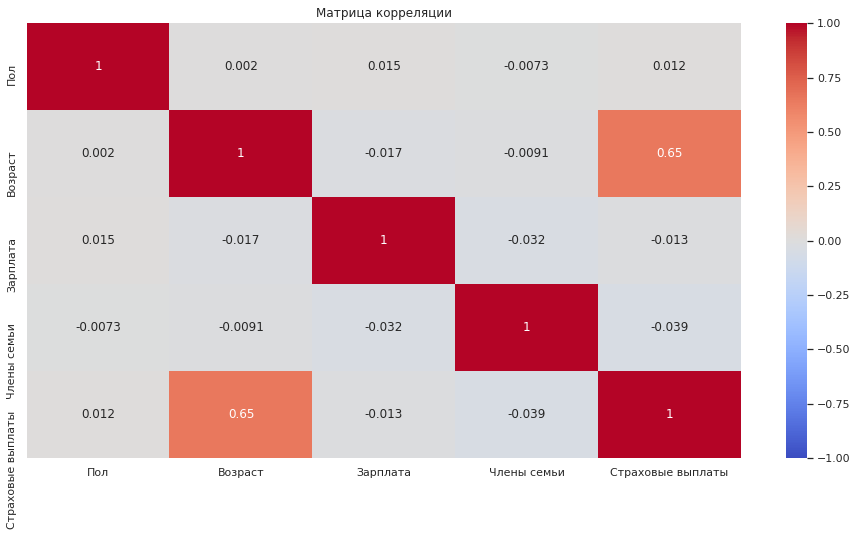

In [14]:
# Воспользуемся методом корреляции и хитмепом для наблюдения зависимостей

# выводим матрицу корреляции
corr_matrix = data.corr()
display(corr_matrix)

# Визуализируем
plt.figure(figsize = (16, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Матрица корреляции')
plt.show()

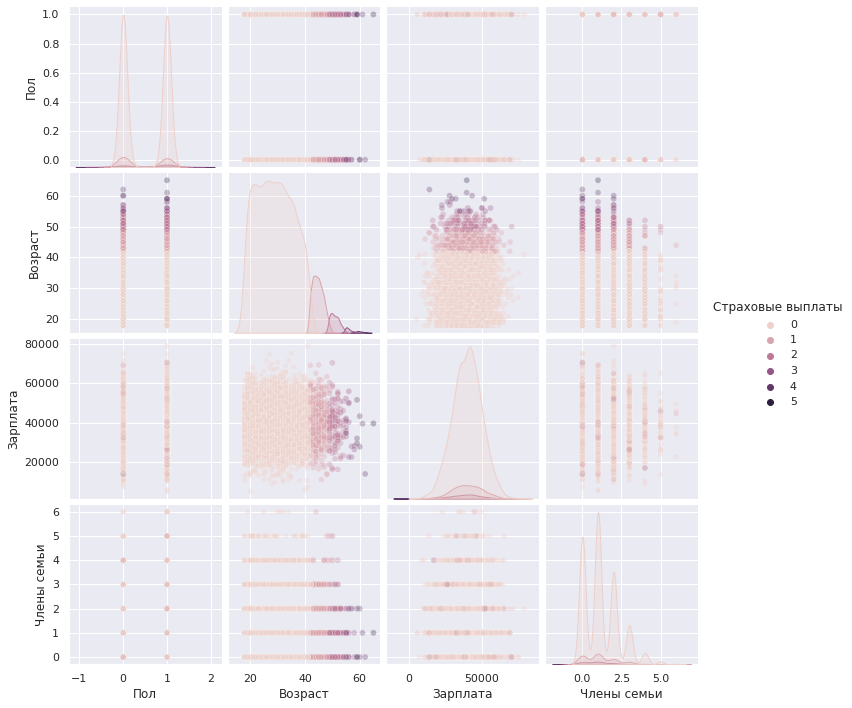

In [15]:
# Построим pair.plot для отображения зависимостей количественных признаков в сравнении целевого признака

sns.pairplot(data, diag_kind='kde', hue='Страховые выплаты', plot_kws={'alpha': 0.3})
plt.show()

Хитмеп нам показывает, что все параметры не сильно коррелируются с целевым признаком. Есть сильная линейная положительная связь между возрастом и страховыми выплатами. Возможно зависимость сложнее. В целом трудно проследить более точные закономерности, на это, в том числе, влияет несбалансированность данных.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

***Ответим на вопрос и обоснуем решение.***

<u>`Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)`</u>
  - `a. Изменится. Приведите примеры матриц.`
  - `b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.`

**Ответ:** <u> Не изменится </u>

**Обоснование:** 

Запишем представление признаков умноженных на обратимую матрицу: $$XP$$

Если качество линейной регрессии не меняется, значит формула предсказания начальной матрицы равна формуле предсказания для преобразованной матрицы:

$$a = a'$$

Следовательно: $$Xw = PXw'$$

Формула обучения в таком случае преобретает следующий вид: $$ w' = ((XP)^T (XP))^{-1} (XP)^T y$$

Преобразуем формулу: $$ w' = (X^T P^T XP)^{-1} (XP)^T y $$ $$ w' = (P^T (X^T X) P)^{-1} X^T P^T y $$ $$ w' = (P^T)^{-1} (X^T X)^{-1} P^{-1} X^T P^T y $$

По определению обратной матрицы: при умножение матрицы на обратную ей получается единичная матрица (E): $$ (P^T)^{-1} P^T = E $$

Формула обучения преобретает следующий вид: $$ w' = P^{-1} (X^T X)^{-1} E X^T y $$

По определению - умножение любой матрицы на единичную матрицу дает результат тойже самой матрицы : $$ A * E = A $$

Поулчаем: $$ w' = P^{-1} (X^T X)^{-1} X^T y $$

Так как    $w = (X^T X)^{-1} X^T y$, то полученную выше формулу можно представить так: $$ w' = P^{-1} w$$

Если подставить полученное значение $w'$ в формулу предсказания, то получаем: $$ a' = X P^{-1} w $$

По определению обратной матрицы и единичной матрицы $P$ и $P^{-1}$ сокращаются: $$ a' = Xw$$ $$ a' = a$$

**Вывод:** Значение предсказания не меняется, т.к. исходная формула предсказаний равна формуле предсказаний для которой матрицу признаков умножили на обратимую матрицу. Качество линейной регрессии не изменится.

## Алгоритм преобразования

***Предложим алгоритм преобразования данных для решения задачи. Выясним, почему качество линейной регрессии не поменяется.***

**Алгоритм**

Для защиты данных клиентов страховой компании «Хоть потоп» мы будем умножать матрицу признаков на обратимую матрицу, которая будет генерироваться случайно.

**Обоснование**


In [16]:
# Объявим переменные признака и цели
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

display(features.head(2))

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1


In [17]:
# генерируем случайную квадратную матрицу такого же размера
random_matrix = np.random.default_rng().standard_normal(size=(4, 4))

# проверим обратимая ли матрица
try:
    invert_matrix = np.linalg.inv(random_matrix)
    print('\nОбратная матрица к заданной существует')
except:
    print('\nОбратная матрица к заданной не существует')


Обратная матрица к заданной существует


*Подставим наши данные в формулы и проведем рассчет*

Предсказания:

$$
a = Xw
$$


Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

In [18]:
# Подставляем значения в формулы

w = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)
a = features @ w

# признаки умножаем на обратимую рандомную матрицу

features_random_matrix = features @ random_matrix

# подставляем
w2 = np.linalg.inv(features_random_matrix.T.dot(features_random_matrix)).dot(features_random_matrix.T).dot(target)
a2 = features_random_matrix @ w2

# сравниваем предсказания
(a - a2).sum()

0.0006237594507675136

Значение предсказания изменяются не значительно по сравнению с предсказаниями, для которой матрицу признаков умножили на обратимую матрицу (менее 0.1%)

## Проверка алгоритма

***Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.***


In [19]:
# С помощью функции train_test_split разобьем датасет на обучающую и валидационную в соотношении 75:25.
# Размер выборки (test_size) = 0,25 (выражается в долях — от 0 до 1), на валидационную выборку отправляем 25% исходных данных

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

# Смотрим размер выборки 
print('Размер обучающей выборки:\n', features_train.shape, '\n', target_train.shape)
print('')
print('Размер валидационной  выборки:\n', features_test.shape, '\n', target_test.shape)

Размер обучающей выборки:
 (3635, 4) 
 (3635,)

Размер валидационной  выборки:
 (1212, 4) 
 (1212,)


In [20]:
# Вычислим результат метрики для исходных признаков.
# Обучим модель линейной регрессии

model = LinearRegression()
model.fit(features_train, target_train)
predict_original = model.predict(features_test)
R2_original = r2_score(target_test, predict_original)
print(f'Значение R2 при использовании исходных признаков = {R2_original}')

Значение R2 при использовании исходных признаков = 0.42307727615837565


In [21]:
# Сделаем разбивку на обучающую и тестовую выборки для обратной матрицы признаков

features_train_random, features_test_random, target_train, target_test = train_test_split(
    features_random_matrix, target, test_size=0.25, random_state=12345)

# Смотрим размер выборки 
print('Размер обучающей выборки:\n', features_train_random.shape, '\n', target_train.shape)
print('')
print('Размер валидационной  выборки:\n', features_test_random.shape, '\n', target_test.shape)

Размер обучающей выборки:
 (3635, 4) 
 (3635,)

Размер валидационной  выборки:
 (1212, 4) 
 (1212,)


In [22]:
# Вычислим результат метрики для признаков, умноженных на обратимую матрицу.
# Обучим модель линейной регрессии

model = LinearRegression()
model.fit(features_train_random, target_train)
predict_random_matrix = model.predict(features_test_random)
R2_random_matrix = r2_score(target_test, predict_random_matrix)
print(f'Значение R2 при использовании признаков, умноженых на обратимую матрицу = {R2_random_matrix}')

Значение R2 при использовании признаков, умноженых на обратимую матрицу = 0.42307727615812873


In [23]:
# Посмотрим результаты

print(f'Разница метрик: {R2_original - R2_random_matrix}')

Разница метрик: 2.469136006766348e-13


Разница качества метрики минимальна

**Вывод:**

Мы разработали метод преобразования данных, чтобы защитить информацию о клиентах страховой компании «Хоть потоп». По данному методу сложно восстановить персональную информацию. Защитили данные таким образом, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

В ходе разработки метода мы:
- Загрузили, изучили и обработали данные по клиентах компании.
- Математически обосновали решение изменения качества модели линейной регрессии при умножении признаков на обратимую матрицу. 
- Данный метод использовали в алгоритме преобразования данных для решения задачи шифрования сведений о клиентах. 
- Применив матричные операции в алгоритме убедились на примере модели линейной регрессии, что качество метрики R2 на исходных признаках и признаках, умноженных на обратимую матрицу, не изменяется.
